In [1]:
# Source:
# http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
# Set up environment

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# importing dataset
acdnts = pd.read_csv('Users/eph/Desktop/Thinkful/US_Accidents_May19.csv')

# dropping columns not used in this analysis
acdnts_df = acdnts.drop(['Source', 'TMC', 'Start_Time', 'End_Time', 'End_Lat',
                        'End_Lng', 'Description', 'Number', 'Street', 'Side',
                        'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 
                        'Astronomical_Twilight', 'Nautical_Twilight', 'Civil_Twilight', 
                        'Sunrise_Sunset', 'Turning_Loop', 'Traffic_Signal', 'Traffic_Calming',
                         'Stop', 'Station', 'Roundabout', 'Railway', 'No_Exit', 'Junction',
                         'Give_Way', 'Crossing', 'Bump', 'Amenity', 'Wind_Speed(mph)',
                         'Wind_Direction', 'Pressure(in)', 'Humidity(%)', 'Wind_Chill(F)',
                         'Temperature(F)', 'County', 'Distance(mi)'], axis=1)
                         
print(acdnts_df.shape)
                         
acdnts_df.info()     
acdnts_df.head()     

print(acdnts_df[['ID']].groupby(acdnts_df['Severity']).agg(['count']))

(2243939, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 10 columns):
ID                   object
Severity             int64
Start_Lat            float64
Start_Lng            float64
City                 object
State                object
Zipcode              object
Visibility(mi)       float64
Precipitation(in)    float64
Weather_Condition    object
dtypes: float64(4), int64(1), object(5)
memory usage: 171.2+ MB
               ID
            count
Severity         
0              17
1             814
2         1455524
3          715582
4           72002


In [5]:
# data documentation states precipitation is null where there is none
# filling this field accordingly
acdnts_df['Precipitation(in)'] = acdnts_df['Precipitation(in)'].fillna(0)
acdnts_df[['Precipitation(in)']].isna().sum()

Precipitation(in)    0
dtype: int64

# Analysis of US Traffic Accidents
### Adverse weather's effect on accident occurrence and impact on traffic

## Ellen Hoffman

## January 2, 2020

- Nobody likes traffic.

- Nobody likes traffic accidents.

- In general, it is more challenging to drive in rain, snow and other adverse weather than in clear conditions.

- In general, adverse weather is associated with more accidents and traffic.

## But is there a statistical correlation between weather, accidents, and traffic?

## Surprisingly, most accidents in the US take place in clear conditions

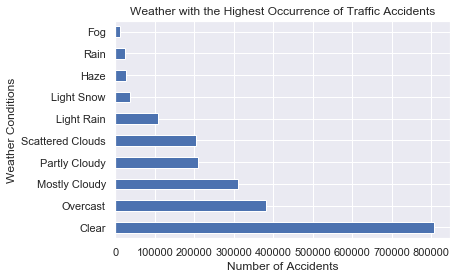

In [6]:
acdnts_df['Weather_Condition'].value_counts().head(10).plot('barh')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.title('Weather with the Highest Occurrence of Traffic Accidents')
plt.show()

## When there is no precipitation

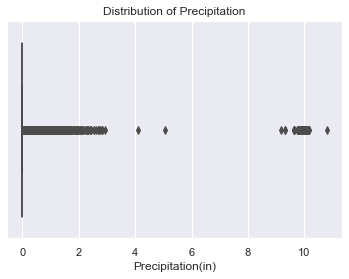

In [7]:
sns.boxplot(x ='Precipitation(in)', data=acdnts_df)
plt.title('Distribution of Precipitation')
plt.show()

## And about 10 miles of visibility.

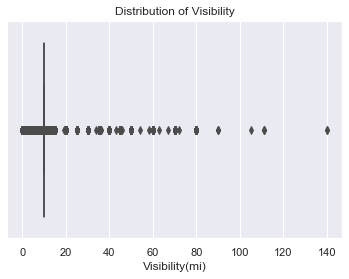

In [8]:
sns.boxplot(x ='Visibility(mi)', data=acdnts_df)
plt.title('Distribution of Visibility')
plt.show()

## Relatively sunny states experience the highest rates of traffic accidents.

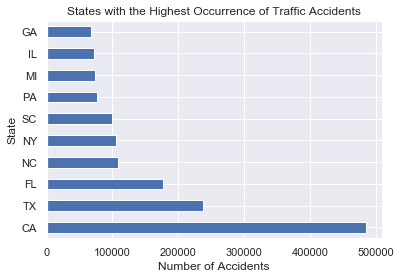

In [32]:
acdnts_df['State'].value_counts().head(10).plot('barh')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.title('States with the Highest Occurrence of Traffic Accidents')
plt.show()

## What about an accident's impact on traffic?

## Weather conditions do not greatly affect an accident's impact on traffic.
#### *Impact on traffic is represented by a 4-point Severity rating, where 1 represents a small impact and 4 represents a large impact.

In [9]:
top_weather = acdnts_df['Weather_Condition'].value_counts().head(10) 
list(top_weather.index) # creating a list with top conditions

['Clear',
 'Overcast',
 'Mostly Cloudy',
 'Partly Cloudy',
 'Scattered Clouds',
 'Light Rain',
 'Light Snow',
 'Haze',
 'Rain',
 'Fog']

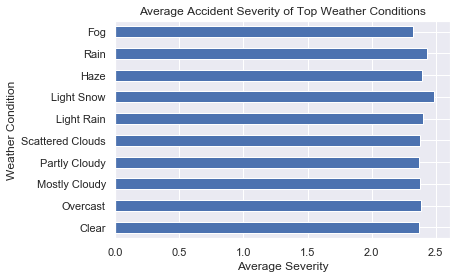

In [10]:
mean_severity = acdnts_df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False)
mean_severity[list(top_weather.index)].plot('barh')
plt.xlabel('Average Severity')
plt.ylabel('Weather Condition')
plt.title('Average Accident Severity of Top Weather Conditions')
plt.show()

## In fact, there are more accidents with large impacts on traffic in the 'Sunshine State' than in any other.

In [11]:
# Creating df to look at severity 4 accidents alone
acdnts_df4 = acdnts_df[acdnts_df['Severity']==4]
acdnts_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72002 entries, 619 to 2243938
Data columns (total 10 columns):
ID                   72002 non-null object
Severity             72002 non-null int64
Start_Lat            72002 non-null float64
Start_Lng            72002 non-null float64
City                 71990 non-null object
State                72002 non-null object
Zipcode              71942 non-null object
Visibility(mi)       68323 non-null float64
Precipitation(in)    72002 non-null float64
Weather_Condition    68239 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 6.0+ MB


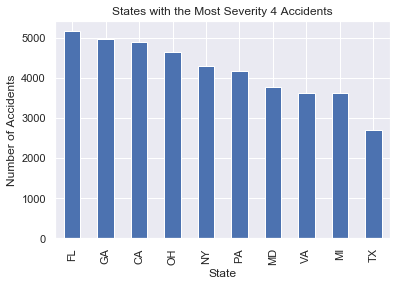

In [12]:
acdnts_df4['State'].value_counts().head(10).plot('bar')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title('States with the Most Severity 4 Accidents')
plt.show()

## Based on my analysis, more research is needed to find variables that can reliably predict accidents and their impacts on traffic across the U.S. As a next step, I would move past environmental factors to focus on issues like:

- Road safety infrastructure

- The driving populations of each state

## Acknowledgments
Thank you to Sobhan Moosavi for making this dataset available.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

## Questions?

In [ ]:
acdnts_df['Severity'].value_counts().plot('bar')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Severity')
plt.show()

In [ ]:
sns.pairplot(acdnts_df, vars=['Visibility(mi)', 'Precipitation(in)', 'Severity'])
print("Relationships between Visibility, Precipitation, and Accident Severity")